<a href="https://colab.research.google.com/github/flyaflya/persuasive/blob/main/demoNotebooks/Metalog_Take2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install numpyro daft jax jaxopt --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


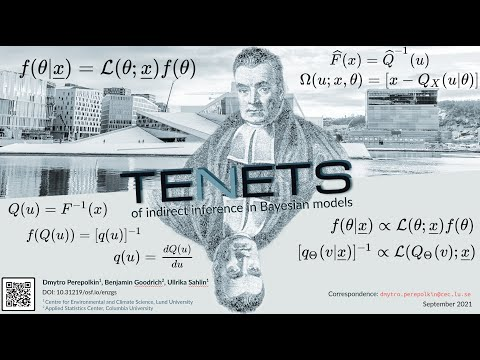

In [18]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
YouTubeVideo('ZtLMtl1G8RQ')  #watch first 11 minutes

### The three-term metalog

#### Metalog Quantile Function (Inverse CDF)
$$
M(y) = a_1 + a_2 \ln \frac{y}{1-y} + a_3 (y-0.5) \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

## Where to get the a coefficients from? (e.g. (a1 = 6, a2 = 4, a3 = 5))

In 

$$
M(y) = x = a_1 + a_2 \ln \frac{y}{1-y} + a_3 (y-0.5) \ln \frac{y}{1-y} \; \; \; \; \textrm{for } 0 < y < 1
$$

Notice RV $x$ is linear in the a coefficients.  So using our triplet, we can set up a linear system to solve for a where we have three equations and three unknowns:

$$
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
= 
\begin{bmatrix}
    1 & \ln \frac{y_1}{1-y_1} & (y_1 - 0.5) \ln \frac{y_1}{1-y_1} \\
    1 & \ln \frac{y_2}{1-y_2} & (y_2 - 0.5) \ln \frac{y_2}{1-y_2} \\
    1 & \ln \frac{y_3}{1-y_3} & (y_3 - 0.5) \ln \frac{y_3}{1-y_3}
\end{bmatrix}
\begin{bmatrix}
    a_1 \\
    a_2 \\
    a_3
\end{bmatrix}
= Ya
$$

we solve 3 linear equations with three unknowns.  Let's take our 6-16-26 triplet of lengths and solve for $a$ where $x$ and $y$ are:

$$
\begin{aligned}
x &= \begin{bmatrix}
    6 \\
    16 \\
    26
\end{bmatrix}
&
y &= \begin{bmatrix}
    0.05 \\
    0.5 \\
    0.95
\end{bmatrix}
\end{aligned}
$$

such that $Y$ is:

$$
Y = 
\begin{bmatrix}
    1 & \ln \frac{0.05}{1-0.05} & (0.05 - 0.5) \ln \frac{0.05}{1-0.05} \\
    1 & \ln \frac{0.5}{1-0.5} & (0.5 - 0.5) \ln \frac{0.5}{1-0.5} \\
    1 & \ln \frac{0.95}{1-0.95} & (0.95 - 0.5) \ln \frac{0.95}{1-0.95}
\end{bmatrix}
$$

such that $Y^{-1}$ is:

In [19]:
Y = np.array([[1, np.log(0.05/(1-0.05)), (0.05-0.5)*np.log(0.05/(1-0.05))],
              [1, np.log(0.5/(1-0.5)), (0.5-0.5)*np.log(0.5/(1-0.5))],
              [1, np.log(0.95/(1-0.95)), (0.95-0.5)*np.log(0.95/(1-0.95))]])

Y_inv = np.linalg.inv(Y)
np.set_printoptions(precision=3, suppress=True)
Y_inv

array([[ 0.   ,  1.   , -0.   ],
       [-0.17 , -0.   ,  0.17 ],
       [ 0.377, -0.755,  0.377]])

$$
Y^{-1} = 
\begin{bmatrix}
    0 & 1 & -0 \\
    -0.17 & -0 & 0.17 \\
    0.377 & -0.755 & 0.377 \\
\end{bmatrix}
$$

such that $a = Y^{-1}x$ results in:
$$
a = Y^{-1} x =
\begin{bmatrix}
    0 & 1 & -0 \\
    -0.17 & -0 & 0.17 \\
    0.377 & -0.755 & 0.377 \\
\end{bmatrix}
\begin{bmatrix}
    6 \\
    16 \\
    26
\end{bmatrix}
=
$$

In [20]:
x = np.array([6,16,26])
x
a = np.matmul(Y_inv, x)
a

array([16.   ,  3.396,  0.   ])

$$
a = 
\begin{bmatrix}
    16 \\
    3.396 \\
    0
\end{bmatrix}
$$

So our updated Metalog distribution looks like this:

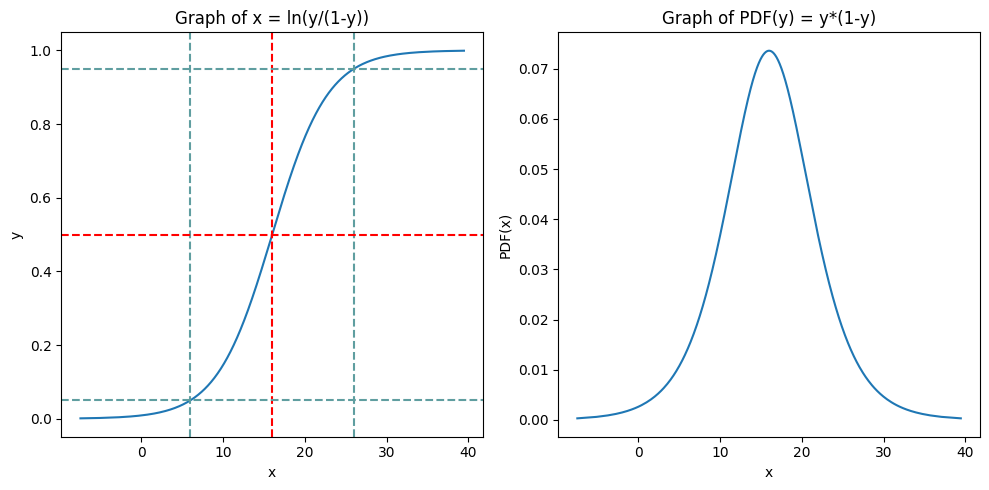

In [5]:
#@title 3-term Metalog (a1 = 16, a2 = 3.396, a3 = 0) of Trout Size Based on Triple 6-16-26
a1 = 16
a2 = 3.396
a3 = 0  ## CHANGE THIS TO BE SMALLER

# Generate values for y between 0 and 1
y = np.linspace(0, 1, num=1000)

# Compute x values using the formula x = ln(y/(1-y))
x1 = a1 + a2 * np.log(y/(1-y)) + a3 * (y - 0.5) * np.log(y/(1-y))  ##CHANGED

# Compute y-axis values for second plot as m(y)
pdf =1 / ((a2 / (y*(1-y))) + a3 * ((y-0.5) / (y*(1-y)) * np.log(y/(1-y))))   ### DERIVATIVE CHANGEs see p. 254 of Keelin (2016)

# Create a new figure with two subplot axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first function on the first subplot axis
ax1.plot(x1, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Graph of x = ln(y/(1-y))')

# Plot the second function on the second subplot axis
ax2.plot(x1, pdf)
ax2.set_xlabel('x')
ax2.set_ylabel('PDF(x)')
ax2.set_title('Graph of PDF(y) = y*(1-y)')

# Add the median point annotation to both subplots
ax1.axvline(16, color='r', linestyle='--')
ax1.axvline(6, color='cadetblue', linestyle='--')
ax1.axvline(26, color='cadetblue', linestyle='--')
ax1.axhline(0.5, color='r', linestyle='--')
ax1.axhline(0.05, color='cadetblue', linestyle='--')
ax1.axhline(0.95, color='cadetblue', linestyle='--')

# Adjust the layout of the subplots and show the plot
fig.tight_layout()
plt.show()

Given this metalog distribution, there are two equivalent ways of parameterizing it.  One way is directly by the coefficients $a = \{a_1,a_2,a_3\} = \{16,3.396,0\}$ (the A-parameterization) or we could have indirectly parameterized it using the quantile-probability tuple $\{p,q\}_n = \{(0.05,6),(0.5,16),(0.95,26)\}$.  Since we have already shown how to go from $\{p,q\}_n$ to $a$, let's now show how, we can generate samples for known $a$.

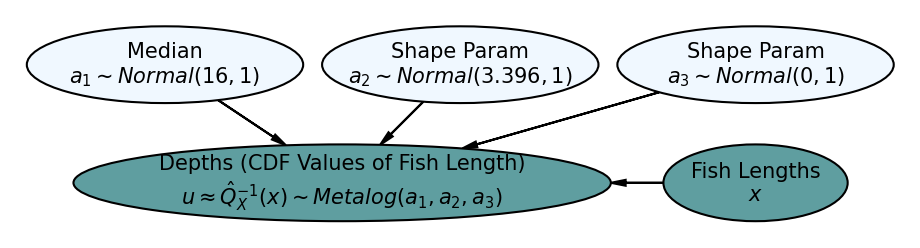

In [21]:
#@title The Incomplete DAG for Placing Priors on Coefficients a
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial, partialmethod
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git
from numpy.random import default_rng
import numpy as np

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, scale = 1.3, aspect = 2.4, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 5.4, fontsize = 9.25, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.3, aspect = 3.6, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.25, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.latNode("a1","Median\n"+r"$a_1 \sim Normal(16,1)$",0,2)
pgm.latNode("a2","Shape Param\n"+r"$a_2 \sim Normal(3.396,1)$",2.5,2)
pgm.latNode("a3","Shape Param\n"+r"$a_3 \sim Normal(0,1)$",5,2)
pgm.obsNode("x","Fish Lengths\n"+r"$x$",5,1)
pgm.obsNode("u","Depths (CDF Values of Fish Length)\n"+r"$u \approx \hat{Q}_X^{-1}(x) \sim Metalog(a_1,a_2,a_3)$",1.5,1, scale = 1.3, aspect = 7)
pgm.add_edge("a1","u")
pgm.add_edge("a2","u")
pgm.add_edge("a3","u")
pgm.add_edge("x","u")
pgm.show(150)

## Getting the Depths With JAX numpyro

We know how to get $x$ given $u$:

$$
Q(u) = x = 16 + 3.396 \ln \frac{u}{1-u} + 0 (u-0.5) \ln \frac{u}{1-u} \; \; \; \; \textrm{for } 0 < u < 1
$$

However, for MCMC, we need the (log)PDF(x) and we currently only have the PDF in terms of depth $u$:

$$
q(u) = [\frac{a_2}{u(1-u)} + a_3(\frac{u-0.5}{u(1-u)})+\ln \frac{u}{1-u}]^{-1} \; \; \; \; \textrm{for } 0 < u < 1
$$

So, either need to find pdf in terms of x or convert data to depths.  The first idea is intractable for the metalog and the second idea can be done numerically.

## Numerically Getting Depths

Let's assume we catch some big fish, say $x = \{16,18,20\}$, we convert these to depths numerically by finding the depths $u$ such that:

$$
x - Q_X(u|a_1,a_2,a_3) = 0
$$

So, for $x=16$, that means find the $u$ such that:

$$
16 = 16 + 3.396 \ln \frac{u}{1-u}
$$

finding solutions to where a function equals zero is called root finding.  For $x=16$, we can do this by hand:

$$
\begin{aligned}
16 + 3.396 \ln \frac{u}{1-u} &= 16 \\
3.396 \ln \frac{u}{1-u} &= 0 \\
\ln \frac{u}{1-u} &= 0 \\
\frac{u}{1-u} &= 1 \\
u &= 1 - u \\
u &= \frac{1}{2}
\end{aligned}
$$

However, let's say we could not do this by hand.  Can we get the computer to reproduce our results?

In [58]:
import jax.numpy as jnp
from jax import jit, vmap, lax
from jaxopt import Bisection

def find_y(M, a1, a2, a3):
    """
    Finds the value of y that corresponds to a given value of M(y), using the bisection method implemented with JAX.

    Parameters:
    M (float): The desired value of M(y).
    a1 (float): The value of coefficient a1.
    a2 (float): The value of coefficient a2.
    a3 (float): The value of coefficient a3.

    Returns:
    float: The value of y that corresponds to the given value of M(y).
    """
    # Define a function that returns the value of M(y) for a given y
    @jit
    def M_fn(y):
        eps = 1e-8  # A small epsilon to avoid taking the log of a negative number
        return a1 + a2 * jnp.log(y / (1 - y + eps)) + a3 * (y - 0.5) * jnp.log(y / (1 - y + eps))

    # Define a function that returns the difference between M(y) and M
    @jit
    def f(y):
        return M_fn(y) - M

    # Set the bracketing interval for the root-finding function
    interval = (1e-7, 1 - 1e-7)

    # Use the bisection function to find the root
    y = Bisection(f, *interval).run().params

    # Return the value of y
    return y

## test the algorithm
a1 = 16.
a2 = 3.396
a3 = 0.0

y = find_y(16, a1, a2, a3)
print(y)

0.5


## Code seems to work!!

The above code works.  This is encouraging, yet incomplete.  I will post an updated notebook once I figure it out :-)